# Setup for the Program

In [ ]:
!pip install "chronos-forecasting[training] @ git+https://github.com/amazon-science/chronos-forecasting.git"

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-install-o30j7r7c/chronos-forecasting_2b308282e84f4daf883c9bbc1708589c
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-install-o30j7r7c/chronos-forecasting_2b308282e84f4daf883c9bbc1708589c
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 8178798f4e1183cb88bf6fdbfaf8c92387805116
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. 

In [ ]:
import kagglehub

path = kagglehub.dataset_download("bwandowando/philippine-cities-weather-data-2020-2023")
print("Path to dataset files:", path)

100%|██████████| 274M/274M [00:05<00:00, 56.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bwandowando/philippine-cities-weather-data-2020-2023/versions/1


In [ ]:
ls -l /root/.cache/kagglehub/datasets/bwandowando/philippine-cities-weather-data-2020-2023/versions/1/

total 1210516
-rw-r--r-- 1 root root       4359 Feb 14 20:41 cities.csv
-rw-r--r-- 1 root root   32614083 Feb 14 20:41 daily_data_combined_2020_to_2023.csv
-rw-r--r-- 1 root root        559 Feb 14 20:41 daily_units_2020_to_2023.csv
-rw-r--r-- 1 root root 1206929851 Feb 14 20:41 hourly_data_combined_2020_to_2023.csv
-rw-r--r-- 1 root root       1246 Feb 14 20:41 hour_units_2020_to_2023.csv


In [ ]:
cp /root/.cache/kagglehub/datasets/bwandowando/philippine-cities-weather-data-2020-2023/versions/1/*.csv /content

In [ ]:
import pandas as pd

# Importing dataset (20-23)
dailydata_combined = pd.read_csv('/content/daily_data_combined_2020_to_2023.csv')

In [ ]:
print("Daily Data Combined columns:", dailydata_combined.columns.tolist())

Daily Data Combined columns: ['city_name', 'datetime', 'weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise', 'sunset', 'daylight_duration', 'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration']


In [ ]:
df = dailydata_combined[['city_name', 'datetime', 'temperature_2m_mean',]]

In [ ]:
print(df.isnull().sum())

city_name              0
datetime               0
temperature_2m_mean    0
dtype: int64


In [ ]:
df.loc[:, 'datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by=['city_name', 'datetime'])
print(df)

             city_name             datetime  temperature_2m_mean
0             Alaminos  2020-01-01 00:00:00                 26.9
1             Alaminos  2020-01-02 00:00:00                 27.8
2             Alaminos  2020-01-03 00:00:00                 26.5
3             Alaminos  2020-01-04 00:00:00                 25.5
4             Alaminos  2020-01-05 00:00:00                 26.7
...                ...                  ...                  ...
205996  Zamboanga City  2023-12-27 00:00:00                 28.4
205997  Zamboanga City  2023-12-28 00:00:00                 28.8
205998  Zamboanga City  2023-12-29 00:00:00                 29.0
205999  Zamboanga City  2023-12-30 00:00:00                 28.1
206000  Zamboanga City  2023-12-31 00:00:00                 28.7

[206001 rows x 3 columns]


In [ ]:
import pandas as pd

df["datetime"] = pd.to_datetime(df["datetime"])
df["day_of_week"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month
df["is_weekend"] = (df["day_of_week"] >= 5).astype(int)  # 1 if weekend, 0 otherwise
df["season"] = df["month"].map({12: "winter", 1: "winter", 2: "winter",
                                3: "spring", 4: "spring", 5: "spring",
                                6: "summer", 7: "summer", 8: "summer",
                                9: "fall", 10: "fall", 11: "fall"})


In [ ]:
print(f"Total number of data: {df.shape[0]}")

Total number of data: 206001


In [ ]:
print(df.head())

  city_name   datetime  temperature_2m_mean  day_of_week  month  is_weekend  \
0  Alaminos 2020-01-01                 26.9            2      1           0   
1  Alaminos 2020-01-02                 27.8            3      1           0   
2  Alaminos 2020-01-03                 26.5            4      1           0   
3  Alaminos 2020-01-04                 25.5            5      1           1   
4  Alaminos 2020-01-05                 26.7            6      1           1   

   season  
0  winter  
1  winter  
2  winter  
3  winter  
4  winter  


In [ ]:
print(df['city_name'].unique())

['Alaminos' 'Angeles City' 'Antipolo' 'Bacolod' 'Bacoor' 'Bago City'
 'Baguio' 'Bais' 'Balanga' 'Batac City' 'Batangas City' 'Bayawan' 'Baybay'
 'Bayugan' 'Bislig' 'Biñan' 'Bogo' 'Borongan' 'Butuan' 'Cabadbaran'
 'Cabanatuan City' 'Cabuyao' 'Cadiz' 'Cagayan de Oro' 'Calaca' 'Calamba'
 'Calapan' 'Calbayog City' 'Caloocan City' 'Candon' 'Canlaon' 'Carcar'
 'Carmona' 'Catbalogan' 'Cauayan' 'Cavite City' 'Cebu City'
 'City of Marikina' 'City of Masbate' 'City of Passi' 'City of Sorsogon'
 'Cotabato' 'Dagupan' 'Danao' 'Dapitan' 'Dasmariñas' 'Davao' 'Digos'
 'Dipolog' 'Dumaguete' 'El Salvador' 'Escalante' 'Gapan' 'General Santos'
 'General Trias' 'Gingoog City' 'Himamaylan' 'Ilagan' 'Iligan City'
 'Iloilo City' 'Imus' 'Iriga City' 'Isabela' 'Kabankalan' 'Kidapawan'
 'Koronadal' 'La Carlota' 'Lamitan' 'Laoag' 'Lapu-Lapu City' 'Las Piñas'
 'Legazpi City' 'Ligao' 'Lipa City' 'Lucena' 'Maasin' 'Mabalacat City'
 'Makati City' 'Malabon' 'Malaybalay' 'Malolos' 'Mandaluyong City'
 'Mandaue City' 'Ma

# Exploratory Data Analysis (EDA) on Raw Data (Only plots)

Before modeling, we visualize the dataset to explore and understand it.

### Temperature Trends in Dataset for each city
Plotting raw temperature trends over time to visualize overall patterns, seasonality, missing values, or anamolies, providing an understanding of the dataset we are working with.

In [ ]:
print(df.index) # Check the original index

RangeIndex(start=0, stop=206001, step=1)


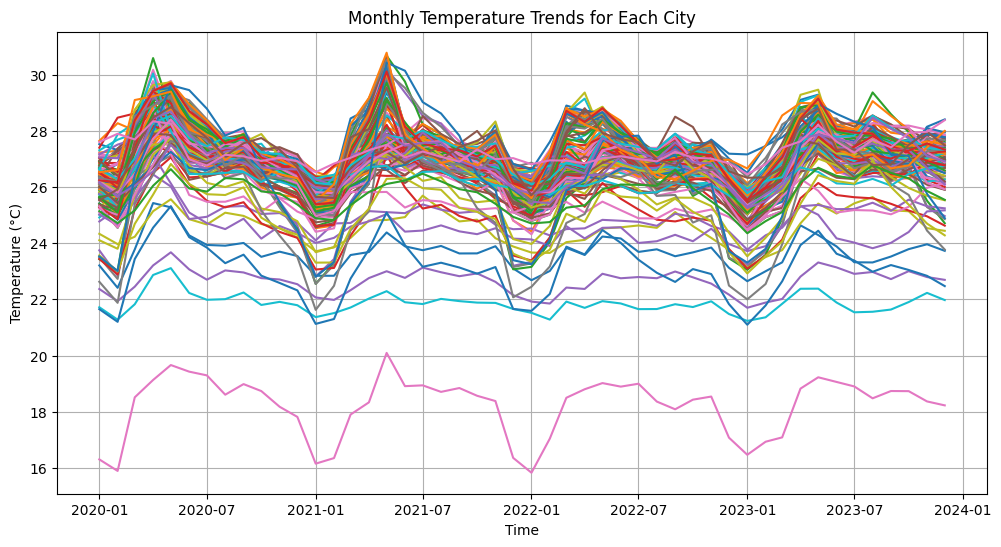

In [ ]:
import matplotlib.pyplot as plt

df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Aggregate by month
numeric_cols = df.select_dtypes(include=["number"]).columns

# Group by city and month
plt.figure(figsize=(12,6))

for city, group in df.groupby("city_name"):
    city_monthly = group[numeric_cols].groupby(group.index.to_period("M")).mean()
    plt.plot(city_monthly.index.to_timestamp(), city_monthly["temperature_2m_mean"], label=city)

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Trends for Each City")
plt.grid()
plt.show()

In [ ]:
print(df.index)
df.reset_index(inplace=True)  # Resetting the index back after plotting to the original index
print(df.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='datetime', length=206001, freq=None)
RangeIndex(start=0, stop=206001, step=1)


**Analysis**: The exploratory plot shows clear periodic rises and falls in temperature, corresponding to warm and cool seasons, with the lowest points occuring around January-February (cooler months), while the highest peaks occur around April-May (summer months).

It also shows that some cities consistently have higher average temperatures (upper cluster) while others stay in the lower temperature range (likely high-altitude or coastal cities).

The visualization of the dataset confirms that it is a consistent and clean dataset which follows strong annual cycles (important for time-series forecasting models), different geographical regions show distinct temperature behaviors and that elevation and coastal proximity significantly impact temperatures. The plot shows no anamolies in form of abrupt, unexplained jumps in temperature.

### Temperature Distribution Plot with Kernel Density Estimate (KDE)

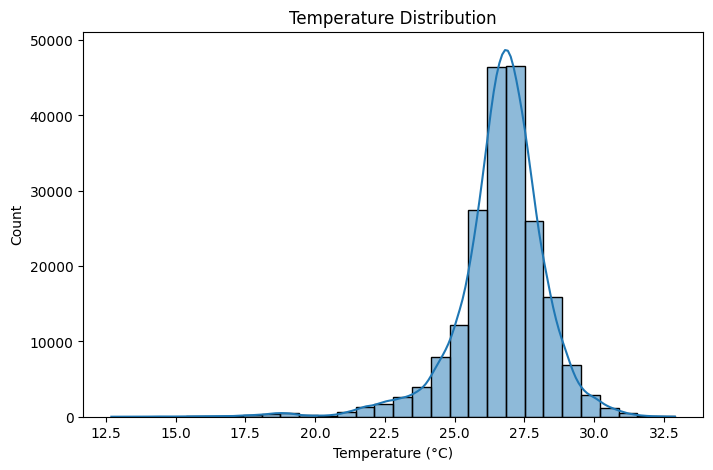

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['temperature_2m_mean'], kde=True, bins=30)
plt.xlabel("Temperature (°C)")
plt.title("Temperature Distribution")
plt.show()

**Problems:**

Training a forecasting model on a dataset with a distribution like this could introduce bias, especially into a regression model, because the dataset places higher emphasis on predicting warmer climates correctly while under-representing colder regions. These issues makes it harder for the model to generalize to unseen data, especially in regions with cooler climates.

# Data Enrichment

In [ ]:
# Define the list of 10 out 137 cities for integrating with the external geospatial input
selected_cities = [
    'Manila', 'Cebu City', 'Davao', 'Baguio', 'Tagaytay City', 'Puerto Princesa City',
    'Zamboanga City', 'Cagayan de Oro', 'Dumaguete', 'Iloilo City'
]

dfc = df[df['city_name'].isin(selected_cities)]
dfc.to_csv("filtered_weather_data.csv", index=False)
print(dfc.head())

       datetime city_name  temperature_2m_mean  day_of_week  month  \
8766 2020-01-01    Baguio                 17.6            2      1   
8767 2020-01-02    Baguio                 17.9            3      1   
8768 2020-01-03    Baguio                 15.9            4      1   
8769 2020-01-04    Baguio                 15.5            5      1   
8770 2020-01-05    Baguio                 16.1            6      1   

      is_weekend  season  
8766           0  winter  
8767           0  winter  
8768           0  winter  
8769           1  winter  
8770           1  winter  


In [ ]:
# Load the filtered weather data and the new geospatial data
geo_data = pd.read_csv("/content/cities_geo_fixed.csv")

# Merge the datasets based on the city name and drop the redundant 'cityu_name' column
enriched_data = pd.merge(dfc, geo_data, left_on="city_name", right_on="cityu_name", how="left").drop('cityu_name', axis=1)
enriched_data.to_csv("enriched_weather_data.csv", index=False)
season_mapping = {'winter': 0, 'spring': 1, 'summer': 2, 'fall': 3}
enriched_data['season'] = enriched_data['season'].map(season_mapping)
print(enriched_data.head())


    datetime city_name  temperature_2m_mean  day_of_week  month  is_weekend  \
0 2020-01-01    Baguio                 17.6            2      1           0   
1 2020-01-02    Baguio                 17.9            3      1           0   
2 2020-01-03    Baguio                 15.9            4      1           0   
3 2020-01-04    Baguio                 15.5            5      1           1   
4 2020-01-05    Baguio                 16.1            6      1           1   

   season  latitude  longitude  elevation (m)  
0       0   16.4023    120.596           1500  
1       0   16.4023    120.596           1500  
2       0   16.4023    120.596           1500  
3       0   16.4023    120.596           1500  
4       0   16.4023    120.596           1500  


# Exploratory Data Analysis (EDA) on Enriched Data
Plots only

### Temperature Trends in Enriched Dataset

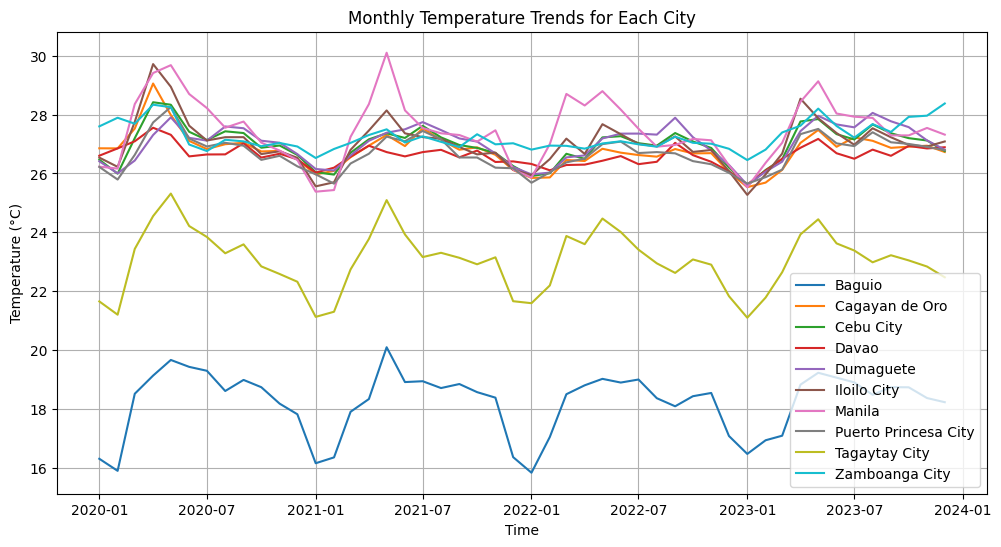

In [ ]:
enriched_data["datetime"] = pd.to_datetime(enriched_data["datetime"])
enriched_data.set_index("datetime", inplace=True)

# Aggregate by month
numeric_cols = enriched_data.select_dtypes(include=["number"]).columns

# Group by city and month
plt.figure(figsize=(12,6))

for city, group in enriched_data.groupby("city_name"):
    city_monthly = group[numeric_cols].groupby(group.index.to_period("M")).mean()
    plt.plot(city_monthly.index.to_timestamp(), city_monthly["temperature_2m_mean"], label=city)

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Trends for Each City")
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(enriched_data.index)
enriched_data.reset_index(inplace=True)
print(enriched_data.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='datetime', length=14610, freq=None)
RangeIndex(start=0, stop=14610, step=1)


**Analysis:** The enriched data plot confirms the analysis concluded on the previous plot due to the isolation of key cities as it reduces information density and provides more readable city-wise trends from a visualization PoV.

The plot confirms consistent seasonal trends across cities (warmer mid-year, cooler at the start of each year) and it also confirms temperature variation by geography as can be seen in case of Baguio which stands out as the coolest city in this dataset due to its highest elevation out of all cities in the dataset.

This visualization provides evidence supporting the correlation of temperature with altitude and justifies the inclusion of elevation as a feature while performing dataset enrichment.

### Feature Correlation Heatmap

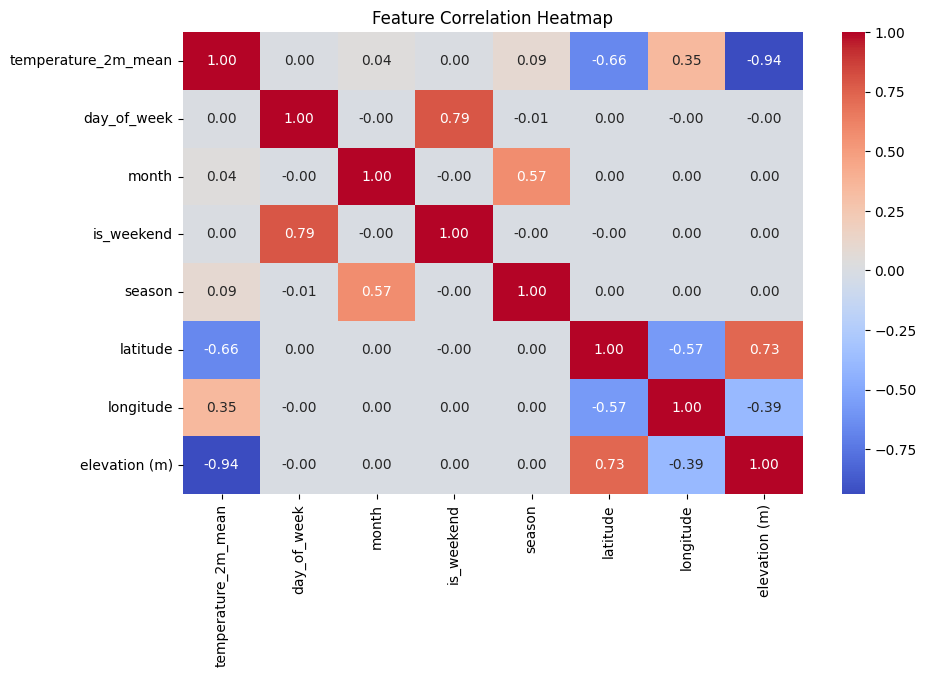

In [ ]:
# Select only numeric columns
numeric_data = enriched_data.select_dtypes(include=["number"])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Analysis:** The main insights that we get from the feature correlation heatmap are:

1.   Strong Negative Correlation Between temperature_2m_mean and elevation (m) (-0.95).
      *   This confirms the expected relationship: Higher elevations are colder.
      *   Justifies the inclusion of elevation as a feature in forecasting models.

2.   Latitude Also Influences Temperature (-0.63).
      *   Cities further north (higher latitudes) tend to be colder.
      *   This supports latitude as a relevant feature for forecasting.

3.   Longitude and Temperature Have a Positive Correlation (0.46)
      *   Possibly indicating eastward cities tend to be warmer, though less significant than latitude/elevation.
  
4.   Season is Moderately Correlated with Month (0.57).
      *   This is expected, since season is derived from months.

In terms of exploratory analysis of the enriched dataset, the key takeaways from the feature correlation heatmap are:

*   Elevation is the strongest predictor of temperature (should definitely be kept as a feature).
*   Latitude has a meaningful impact on temperature (good for forecasting as it is true that moving farther from the equater results in a cooler climate).
*   Season-month correlation is expected and helps validate data consistency.
*   No unexpected or suspicious relationships (dataset looks clean and logically structured).

# Data Distribution and Quality Analysis

## Temperature Distribution Plot with Kernel Density Estimate (KDE)

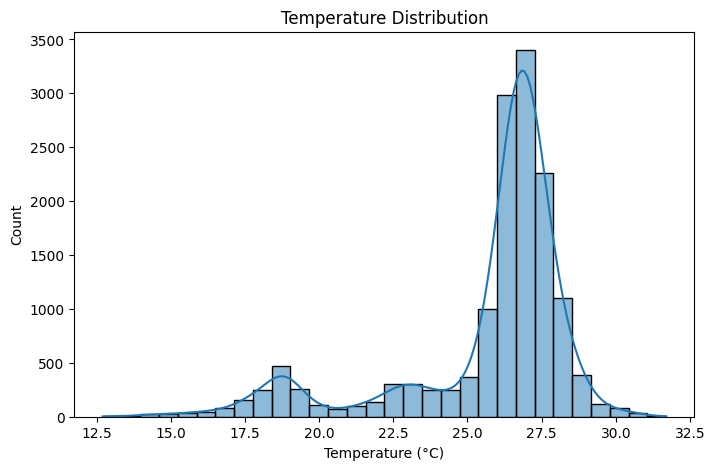

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(enriched_data['temperature_2m_mean'], kde=True, bins=30)
plt.xlabel("Temperature (°C)")
plt.title("Temperature Distribution")
plt.show()

**Notes:**

The KDE curve smooths out the temperature values, making it clear that there are two peaks (bimodal distribution). If KDE were disabled, the histogram can look more jagged, making it harder to see the two groups.
The shape of the KDE line helps confirm whether the data is normally distributed, skewed, or multimodal. KDE should be used when you want to understand the overall shape of the distribution of a continuous variable (temperature in this case) and when you suspect multiple peaks (bimodal/multimodal distributions).

**Plot Analysis:**

The temperature distribution shows the temperature values do not follow a perfect normal distribution and it is instead a bimodal distribution. There are two distinct peaks:

*   One clusters around 18-20°C.
*   The other clusters around 25-28°C.

This suggests the data contains two different climate regions in the dataset where the lower peak represents cooler cities (probably high-altitude or northern cities) while the higher peak corresponds to warmer cities (lowland/coastal cities or southern cities).

**Conclusion:** The plot confirms that the data is clean and well-maintained, with no outliers, anamolies or errors and it contains a bimodal pattern which is due to geographic differences, justifying the inclusion of geographic data (elevation, longitude, latitude) to enrich the raw data.

# Removing Features for Testing

In [ ]:
print("Dataset shape:", enriched_data.shape)
print(enriched_data)

Dataset shape: (14610, 10)
        datetime       city_name  temperature_2m_mean  day_of_week  month  \
0     2020-01-01          Baguio                 17.6            2      1   
1     2020-01-02          Baguio                 17.9            3      1   
2     2020-01-03          Baguio                 15.9            4      1   
3     2020-01-04          Baguio                 15.5            5      1   
4     2020-01-05          Baguio                 16.1            6      1   
...          ...             ...                  ...          ...    ...   
14605 2023-12-27  Zamboanga City                 28.4            2     12   
14606 2023-12-28  Zamboanga City                 28.8            3     12   
14607 2023-12-29  Zamboanga City                 29.0            4     12   
14608 2023-12-30  Zamboanga City                 28.1            5     12   
14609 2023-12-31  Zamboanga City                 28.7            6     12   

       is_weekend  season  latitude  longitude  

In [ ]:
features_to_drop = ["is_weekend"]
enriched_data = enriched_data.drop(columns=features_to_drop)

print("Updated dataset shape:", enriched_data.shape)

Updated dataset shape: (14610, 9)


# Preparing time series data for model training and evaluation

In [ ]:
# Verifying unique values in "seasons" to ensure they are numerical instead of categorical
print(enriched_data['season'].unique())

[0 1 2 3]


In [ ]:
import pandas as pd

enriched_data['datetime'] = pd.to_datetime(enriched_data['datetime'])

# Set 'item_id' (city_name) and 'timestamp' (datetime) as multi-index
enriched_data.set_index(['city_name', 'datetime'], inplace=True)
print(enriched_data.head())

                      temperature_2m_mean  day_of_week  month  season  \
city_name datetime                                                      
Baguio    2020-01-01                 17.6            2      1       0   
          2020-01-02                 17.9            3      1       0   
          2020-01-03                 15.9            4      1       0   
          2020-01-04                 15.5            5      1       0   
          2020-01-05                 16.1            6      1       0   

                      latitude  longitude  elevation (m)  
city_name datetime                                        
Baguio    2020-01-01   16.4023    120.596           1500  
          2020-01-02   16.4023    120.596           1500  
          2020-01-03   16.4023    120.596           1500  
          2020-01-04   16.4023    120.596           1500  
          2020-01-05   16.4023    120.596           1500  


# TimeSeriesForecasting Format

In [ ]:
import pandas as pd

enriched_data.reset_index(inplace=True)
enriched_data.rename(columns={'datetime': 'timestamp', 'city_name': 'item_id'}, inplace=True)
enriched_data.drop(columns=['hour'], errors='ignore', inplace=True)
enriched_data.set_index(['item_id', 'timestamp'], inplace=True)
print(enriched_data.head())


                    temperature_2m_mean  day_of_week  month  season  latitude  \
item_id timestamp                                                               
Baguio  2020-01-01                 17.6            2      1       0   16.4023   
        2020-01-02                 17.9            3      1       0   16.4023   
        2020-01-03                 15.9            4      1       0   16.4023   
        2020-01-04                 15.5            5      1       0   16.4023   
        2020-01-05                 16.1            6      1       0   16.4023   

                    longitude  elevation (m)  
item_id timestamp                             
Baguio  2020-01-01    120.596           1500  
        2020-01-02    120.596           1500  
        2020-01-03    120.596           1500  
        2020-01-04    120.596           1500  
        2020-01-05    120.596           1500  


In [ ]:
print(enriched_data.index.get_level_values("item_id").unique())

Index(['Baguio', 'Cagayan de Oro', 'Cebu City', 'Davao', 'Dumaguete',
       'Iloilo City', 'Manila', 'Puerto Princesa City', 'Tagaytay City',
       'Zamboanga City'],
      dtype='object', name='item_id')


In [ ]:
from autogluon.timeseries import TimeSeriesDataFrame

# Convert enriched_data (pandas DataFrame) to AutoGluon-compatible TimeSeriesDataFrame
ts_data = TimeSeriesDataFrame.from_data_frame(enriched_data)
prediction_length = 90 # No of days in the future

total_timestamps = len(ts_data.index.get_level_values("timestamp").unique())
train_size = int(0.8 * total_timestamps)  # 80% of the total

train_data = ts_data.loc[ts_data.index.get_level_values("timestamp") < ts_data.index.get_level_values("timestamp")[train_size]]
test_data = ts_data.loc[ts_data.index.get_level_values("timestamp") >= ts_data.index.get_level_values("timestamp")[train_size]]

print(ts_data.size)
print("Total timestamps:", total_timestamps)
print("Train size (80%):", train_size)
print("Test size (20%):", total_timestamps - train_size)
print("Train start:", train_data.index.get_level_values("timestamp").min(), "Train end:", train_data.index.get_level_values("timestamp").max())
print("Test start:", test_data.index.get_level_values("timestamp").min(), "Test end:", test_data.index.get_level_values("timestamp").max())


102270
Total timestamps: 1461
Train size (80%): 1168
Test size (20%): 293
Train start: 2020-01-01 00:00:00 Train end: 2023-03-13 00:00:00
Test start: 2023-03-14 00:00:00 Test end: 2023-12-31 00:00:00


In [ ]:
print(ts_data.head())

                    temperature_2m_mean  day_of_week  month  season  latitude  \
item_id timestamp                                                               
Baguio  2020-01-01                 17.6            2      1       0   16.4023   
        2020-01-02                 17.9            3      1       0   16.4023   
        2020-01-03                 15.9            4      1       0   16.4023   
        2020-01-04                 15.5            5      1       0   16.4023   
        2020-01-05                 16.1            6      1       0   16.4023   

                    longitude  elevation (m)  
item_id timestamp                             
Baguio  2020-01-01    120.596           1500  
        2020-01-02    120.596           1500  
        2020-01-03    120.596           1500  
        2020-01-04    120.596           1500  
        2020-01-05    120.596           1500  


## Generate Future Known Covariates to plot Predictions

In [ ]:
test_data = test_data.sort_index()
last_date = test_data.index.get_level_values("timestamp").max()

# Create future timestamps for the prediction
future_dates = pd.date_range(start=last_date, periods=prediction_length+1, freq="D")[1:]

future_known_covariates = []
for city in test_data.index.get_level_values("item_id").unique():
    for date in future_dates:
        future_known_covariates.append([city, date])

future_known_covariates = pd.DataFrame(future_known_covariates, columns=["item_id", "timestamp"])

future_known_covariates["day_of_week"] = future_known_covariates["timestamp"].dt.day
future_known_covariates["month"] = future_known_covariates["timestamp"].dt.month

# Assigned according to the season pattern in the dataset
def assign_season(month):
    if month in [12, 1, 2]:  # Winter
        return 0
    elif month in [3, 4, 5]:  # Spring
        return 1
    elif month in [6, 7, 8]:  # Summer
        return 2
    elif month in [9, 10, 11]:  # Autumn
        return 3

future_known_covariates["season"] = future_known_covariates["month"].apply(assign_season)

# Merge static geographic features (longitude, latitude, elevation) from test_data
future_known_covariates = future_known_covariates.merge(
    test_data.reset_index()[["item_id", "longitude", "latitude", "elevation (m)"]].drop_duplicates(),
    on="item_id",
    how="left"
)

future_known_covariates.set_index(["item_id", "timestamp"], inplace=True)

In [ ]:
print(future_known_covariates)

                           day_of_week  month  season  longitude  latitude  \
item_id        timestamp                                                     
Baguio         2024-01-01            1      1       0   120.5960   16.4023   
               2024-01-02            2      1       0   120.5960   16.4023   
               2024-01-03            3      1       0   120.5960   16.4023   
               2024-01-04            4      1       0   120.5960   16.4023   
               2024-01-05            5      1       0   120.5960   16.4023   
...                                ...    ...     ...        ...       ...   
Zamboanga City 2024-03-26           26      3       1   122.0785    6.9322   
               2024-03-27           27      3       1   122.0785    6.9322   
               2024-03-28           28      3       1   122.0785    6.9322   
               2024-03-29           29      3       1   122.0785    6.9322   
               2024-03-30           30      3       1   122.0785

# Final Predictor Model Comparisons (time_limit=200, ensemble true)

In [ ]:
from autogluon.timeseries import TimeSeriesPredictor

predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    target="temperature_2m_mean",
    known_covariates_names=["day_of_week", "month", "longitude", "latitude", "season", "elevation (m)"],
).fit(
    train_data,
    hyperparameters={
        "Chronos": [
            {
                "model_path": "bolt_small",
                "ag_args": {"name_suffix": "ZeroShot"},
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "ag_args": {"name_suffix": "ZeroShot"},
            },
            {
                "model_path": "bolt_small",  # Using a larger model
                "covariate_regressor": "CAT",  # Trying a different regressor
                "target_scaler": "standard",  # Using a standard scaler
                "ag_args": {"name_suffix": "WithRegressorCAT_standard"},
            },
            {
                "model_path": "bolt_small",  # Using a larger model
                "covariate_regressor": "XGB",  # Trying a different regressor
                "target_scaler": "standard",  # Using a standard scaler
                "ag_args": {"name_suffix": "WithRegressorXGB_standard"},
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "covariate_regressor": "CAT",  # Trying a different regressor
                "target_scaler": "standard",  # Using a standard scaler
                "ag_args": {"name_suffix": "WithRegressorCAT_standard"},
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "covariate_regressor": "CAT",  # Trying a different regressor
                "target_scaler": "robust",  # Using a robust scaler
                "ag_args": {"name_suffix": "WithRegressorCAT_robust"},
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "covariate_regressor": "CAT",  # Trying a different regressor
                "target_scaler": "mean_abs",  # Using a robust scaler
                "ag_args": {"name_suffix": "WithRegressorCAT_meanabs"},
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "covariate_regressor": "CAT",  # Trying a different regressor
                "target_scaler": "min_max",  # Using a robust scaler
                "ag_args": {"name_suffix": "WithRegressorCAT_minmax"},
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "covariate_regressor": "XGB",  # Trying a different regressor
                "target_scaler": "standard",  # Using a standard scaler
                "ag_args": {"name_suffix": "WithRegressorXGB_standard"},
                #"fine_tune": "True",
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "covariate_regressor": "XGB",  # Trying a different regressor
                "target_scaler": "robust",  # Using a robust scaler
                "ag_args": {"name_suffix": "WithRegressorXGB_robust"},
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "covariate_regressor": "XGB",  # Trying a different regressor
                "target_scaler": "mean_abs",  # Using a robust scaler
                "ag_args": {"name_suffix": "WithRegressorXGB_meanabs"},
            },
            {
                "model_path": "bolt_base",  # Using a larger model
                "covariate_regressor": "XGB",  # Trying a different regressor
                "target_scaler": "min_max",  # Using a robust scaler
                "ag_args": {"name_suffix": "WithRegressorXGB_minmax"},
            },

        ],
    },
    enable_ensemble=True,
    time_limit=200,  # Time limit in seconds
)

Beginning AutoGluon training... Time limit = 200s
AutoGluon will save models to '/content/AutogluonModels/ag-20250214_204717'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       10.96 GB / 12.67 GB (86.5%)
Disk Space Avail:   71.26 GB / 107.72 GB (66.2%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_small'},
                                 {'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_base'},
                                 {'ag_args': {'name_suffix': 'WithRegressorCAT_standard'},
                                  'covariate_regressor': 'CAT',
    

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/191M [00:00<?, ?B/s]

	Time limit exceeded... Skipping ChronosZeroShot[bolt_small].
Training timeseries model ChronosZeroShot[bolt_base]. Training for up to 13.2s of the 158.5s of remaining time.


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

	-0.0229       = Validation score (-WQL)
	0.05    s     = Training runtime
	28.60   s     = Validation (prediction) runtime
Training timeseries model ChronosWithRegressorCAT_standard[bolt_small]. Training for up to 11.8s of the 129.9s of remaining time.
	-0.0244       = Validation score (-WQL)
	2.42    s     = Training runtime
	2.67    s     = Validation (prediction) runtime
Training timeseries model ChronosWithRegressorXGB_standard[bolt_small]. Training for up to 12.5s of the 124.8s of remaining time.
	-0.0240       = Validation score (-WQL)
	0.89    s     = Training runtime
	2.63    s     = Validation (prediction) runtime
Training timeseries model ChronosWithRegressorCAT_standard[bolt_base]. Training for up to 13.5s of the 121.2s of remaining time.
	-0.0244       = Validation score (-WQL)
	2.11    s     = Training runtime
	9.44    s     = Validation (prediction) runtime
Training timeseries model ChronosWithRegressorCAT_robust[bolt_base]. Training for up to 13.7s of the 109.6s of rema

### Predictor Leaderboard

In [ ]:
predictor.leaderboard(test_data) # 90DAYS

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,ChronosWithRegressorXGB_standard[bolt_base],-0.015701,-0.024306,3.828937,7.671886,0.899866,8
1,ChronosWithRegressorXGB_standard[bolt_small],-0.015701,-0.024009,2.333766,2.631701,0.892352,3
2,ChronosWithRegressorXGB_meanabs[bolt_base],-0.015726,-0.023787,3.554042,8.674003,0.577819,10
3,ChronosWithRegressorXGB_minmax[bolt_base],-0.015873,-0.024645,2.979529,6.914334,0.795196,11
4,ChronosWithRegressorCAT_minmax[bolt_base],-0.015910,-0.024685,3.935057,8.055352,1.860308,7
5,ChronosWithRegressorXGB_robust[bolt_base],-0.015960,-0.024117,3.014132,6.635940,1.249938,9
6,ChronosWithRegressorCAT_meanabs[bolt_base],-0.016422,-0.023855,2.945314,6.685701,1.781861,6
7,ChronosWithRegressorCAT_standard[bolt_base],-0.016506,-0.024427,2.783211,9.439753,2.105336,4
8,ChronosWithRegressorCAT_standard[bolt_small],-0.016536,-0.024420,1.506128,2.667262,2.420000,2
9,ChronosWithRegressorCAT_robust[bolt_base],-0.017254,-0.024479,3.008068,8.225869,1.682538,5


### Leaderboard Visualization

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


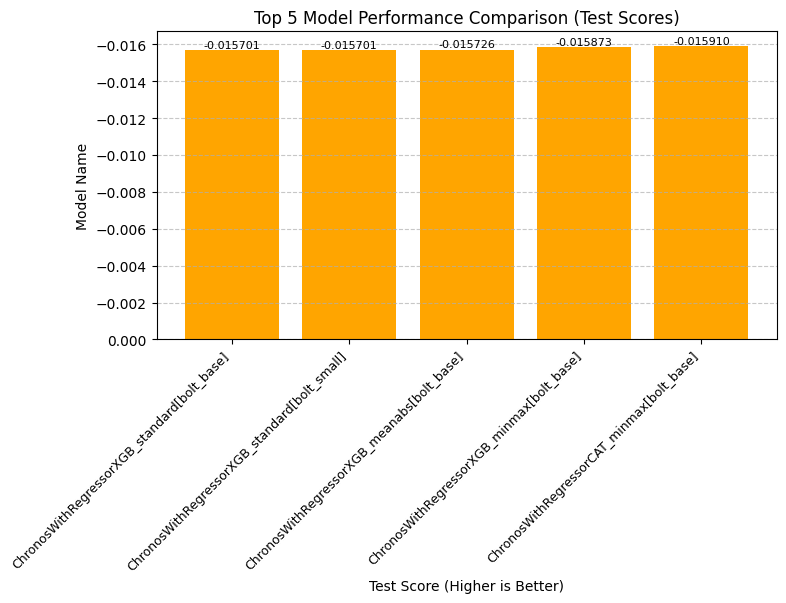

In [ ]:
# Get leaderboard results directly from predictor
leaderboard_df = predictor.leaderboard(test_data)
df = leaderboard_df[["model", "score_test"]].copy()

df = df.head(5) # Top 5 performing models
df = df.sort_values(by="score_test", ascending=False)

plt.figure(figsize=(8, 4))
bars = plt.bar(df["model"], df["score_test"], color="orange")
plt.xticks(rotation=45, ha="right", fontsize=9)
for bar, score in zip(bars, df["score_test"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{score:.6f}",
             ha="center", va="bottom", fontsize=8, color="black")

plt.xlabel("Test Score (Higher is Better)")
plt.ylabel("Model Name")
plt.title("Top 5 Model Performance Comparison (Test Scores)")
plt.gca().invert_yaxis()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Model Performance Visualization

In [ ]:
predictions = predictor.predict(test_data,
                                known_covariates=future_known_covariates,
                                model = 'ChronosWithRegressorXGB_standard[bolt_base]',
                                use_cache = True)

#### Manual Extended Line Plot

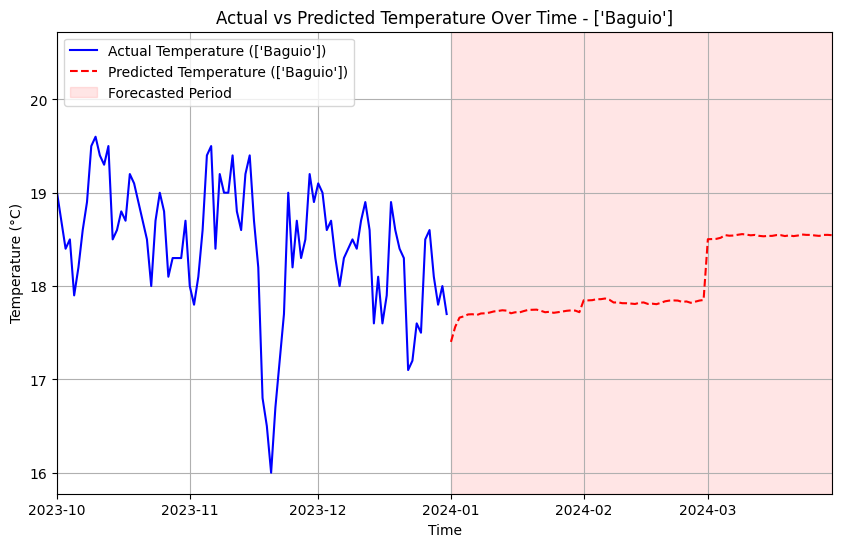

In [ ]:
selected_city = ["Baguio"]
actual_values = test_data.loc[selected_city, "temperature_2m_mean"]
predicted_values = predictions.loc[selected_city, "mean"]
actual_timestamps = actual_values.index.get_level_values("timestamp")
predicted_timestamps = predicted_values.index.get_level_values("timestamp")

# First predicted timestamp
forecast_start = min(predicted_timestamps)
# Plot historical and predicted values
plt.figure(figsize=(10,6))
plt.plot(actual_timestamps, actual_values, color='blue', label=f"Actual Temperature ({selected_city})", linestyle='-')
plt.plot(predicted_timestamps, predicted_values, color='red', label=f"Predicted Temperature ({selected_city})", linestyle='--')
plt.axvspan(forecast_start, max(predicted_timestamps), color='red', alpha=0.1, label="Forecasted Period")

start_date = pd.to_datetime("2023-10-01")
plt.xlim(start_date, max(predicted_timestamps))

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title(f"Actual vs Predicted Temperature Over Time - {selected_city}")
plt.legend()
plt.grid()
plt.show()

#### Plot using predictor.plot()

'\n# Close all figures except the last one\nfor fig in new_figs[:-1]:\n    plt.close(fig)  # Closes earlier figures\n\n# Show only the last plot\nplt.show()\n'

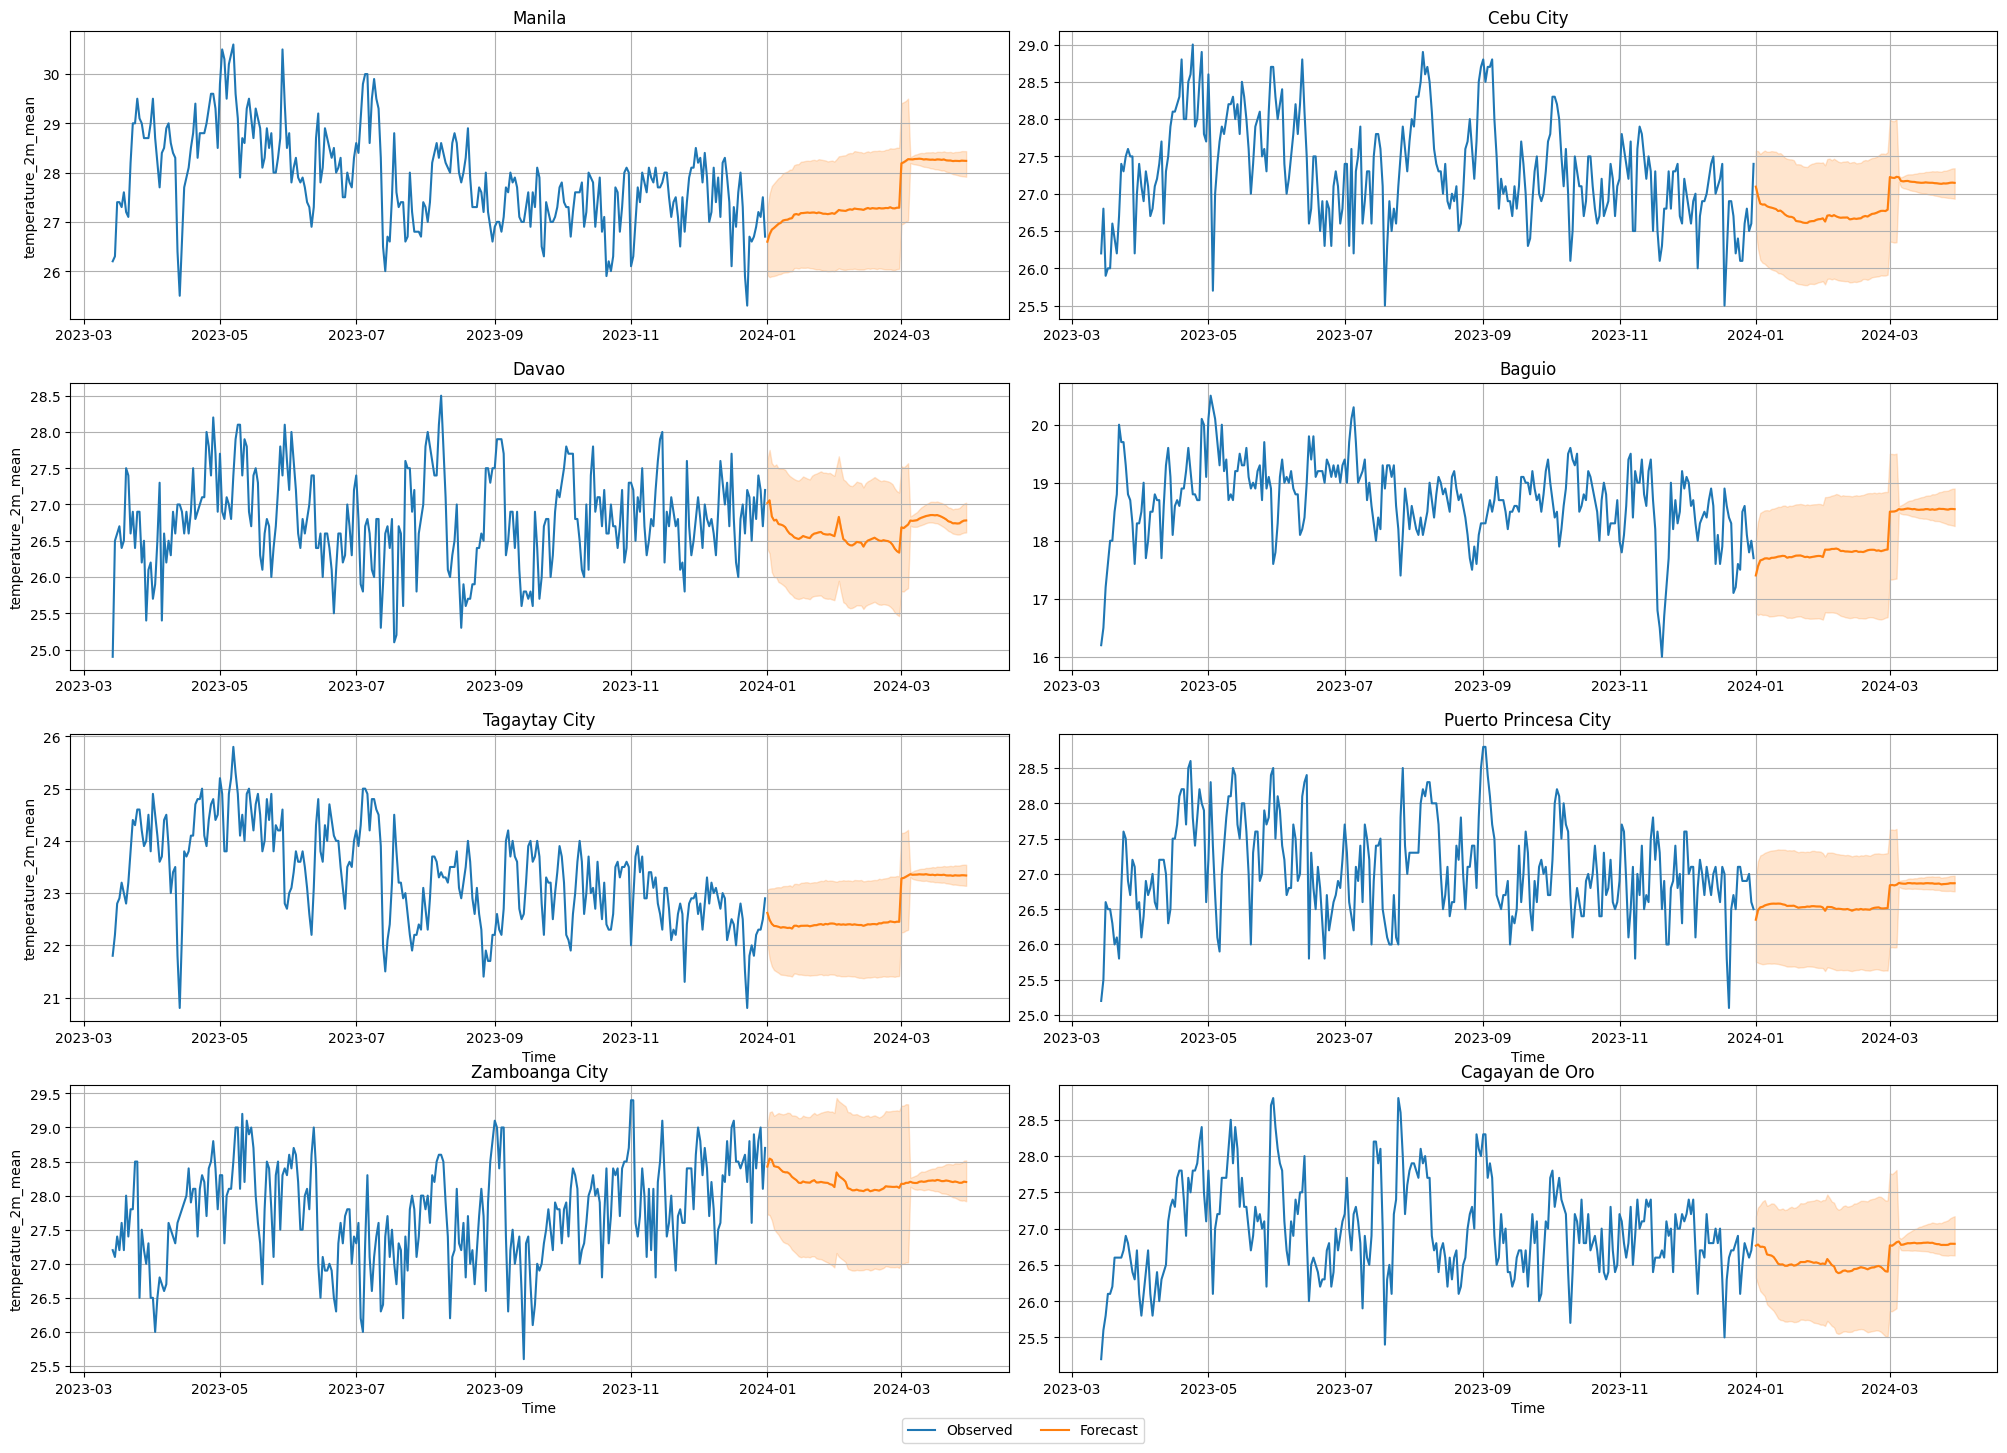

In [ ]:
# Define figs before calling predictor.plot()
figs = plt.get_fignums()

predictor.plot(
    data=test_data,
    predictions=predictions,
    item_ids=['Manila', 'Cebu City', 'Davao', 'Baguio', 'Tagaytay City', 'Puerto Princesa City', 'Zamboanga City', 'Cagayan de Oro', 'Dumaguete', 'Iloilo City'],
    point_forecast_column="mean"
)

new_figs = [fig for fig in plt.get_fignums() if fig not in figs]
'''
# Close all figures except the last one
for fig in new_figs[:-1]:
    plt.close(fig)  # Closes earlier figures

# Show only the last plot
plt.show()
'''